<a href="https://colab.research.google.com/github/saurabhmishra1806/Projects-/blob/master/Social_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Edges: Interactions and Nodes: Components of a Network

### Network Analysis can be used to study how pathogens, behaviors and information spread in social networks, having important implications of our understanding of epidemics and planning of effective interventions. In biological level, Network analysis can help us in gene regulation, signal transduction networks, protein interaction networks and much many more.

**Dataset from Rural village areas in India**
[Banerjee et al. 2013: The Diffusion of Microfinance External link](https://science.sciencemag.org/content/341/6144/1236498.full)



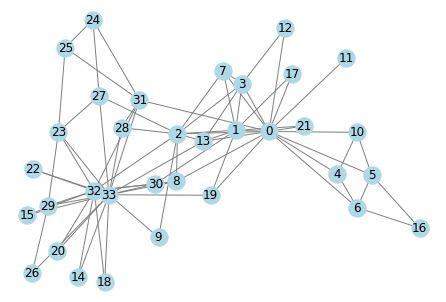

In [81]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()

nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")

In [82]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [83]:
G.degree()[0] == G.degree(0)

True

In [84]:
sum_of_edges = 0
for i in range(len(G.nodes())):
  sum_of_edges += G.degree()[i]

sum_of_edges

156

In [85]:
print(G.number_of_nodes(),G.number_of_edges())

34 78


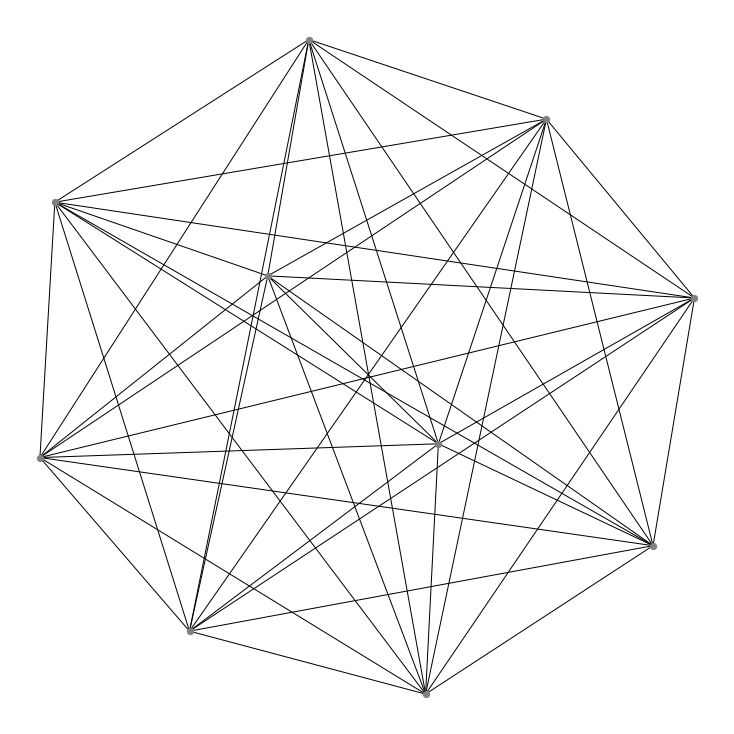

In [86]:
from scipy.stats import bernoulli

N=20
p=0.2

def erdos_renyi_graph(N,p):
  
  G = nx.Graph()
  G.add_nodes_from(range(N))
  for node1 in G.nodes():
    for node2 in G.nodes():
      if node1<node2:
        if bernoulli.rvs(p=p):
          G.add_edge(node1, node2)

  return G

plt.figure(figsize=(10,10))
nx.draw(erdos_renyi_graph(10, 1), node_size=40, node_color="gray")

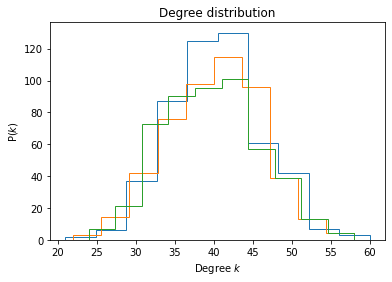

In [87]:
def plot_degree_destribution(G):
  degree_values = [v for k,v in G.degree()]
  plt.hist(degree_values, histtype="step")
  plt.xlabel("Degree $k$")
  plt.ylabel("P($k$)")
  plt.title("Degree distribution")

G = erdos_renyi_graph(500,0.08)
plot = plot_degree_destribution(G)
plot
G1 = erdos_renyi_graph(500,0.08)
plot = plot_degree_destribution(G1)
plot
G2 = erdos_renyi_graph(500,0.08)
plot = plot_degree_destribution(G2)
plot

In [88]:
from google.colab import files
uploaded = files.upload()

Number of nodes:  843
Number of edges:  3405
Mean degree:  8.078291814946619
Number of nodes:  877
Number of edges:  3063
Mean degree:  6.985176738882554


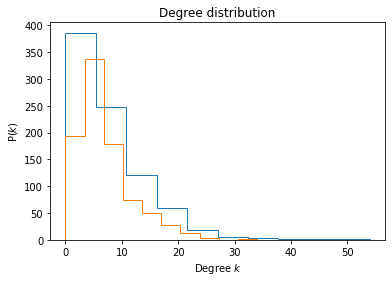

In [89]:
import numpy as np
A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")

V1 = nx.to_networkx_graph(A1)
V2 = nx.to_networkx_graph(A2)

def basic_net_stats(V):
  print("Number of nodes: ", V.number_of_nodes())
  print("Number of edges: ", V.number_of_edges())
  V_values = [v for k,v in V.degree()]
  print("Mean degree: ", np.mean(V_values))

basic_net_stats(V1)
basic_net_stats(V2)

plot_degree_destribution(V1)
plot_degree_destribution(V2)

In [90]:
connected_components_subgraphs1 = (V1.subgraph(c) for c in nx.connected_components(V1))
print(connected_components_subgraphs1)
connected_components_subgraphs2 = (V2.subgraph(c) for c in nx.connected_components(V2))
print(connected_component_subgraphs2)

V1_LCC = max(connected_components_subgraphs1, key=len)
V2_LCC = max(connected_components_subgraphs2, key=len)
print(V1_LCC.number_of_nodes()/V1.number_of_nodes())
print(V2_LCC.number_of_nodes()/V2.number_of_nodes())

<generator object <genexpr> at 0x7fcabc99d780>
<generator object <genexpr> at 0x7fcabc7b6bf8>
0.9786476868327402
0.9236031927023945


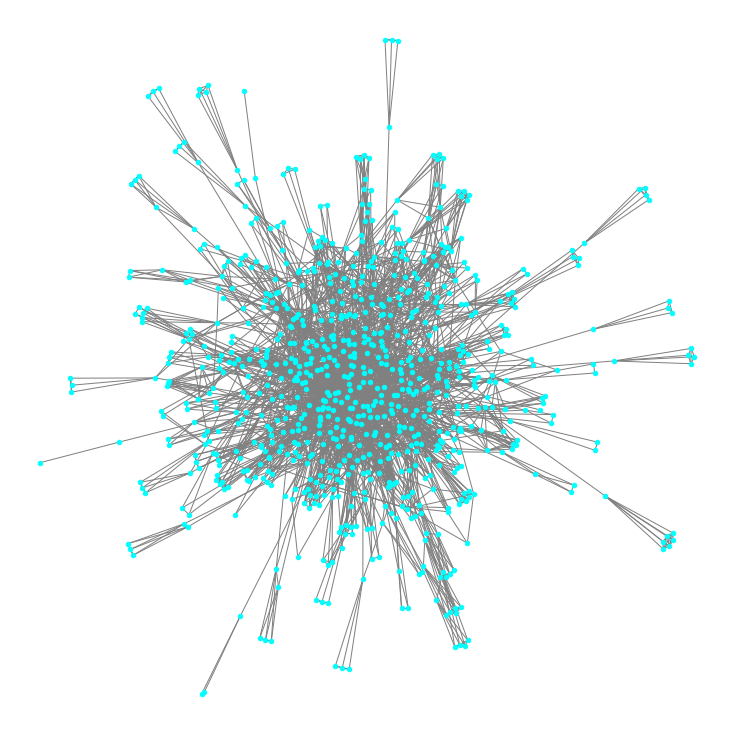

In [91]:
plt.figure(figsize=(10,10))
nx.draw(V1_LCC, node_color="cyan", node_size=20, edge_color="gray")

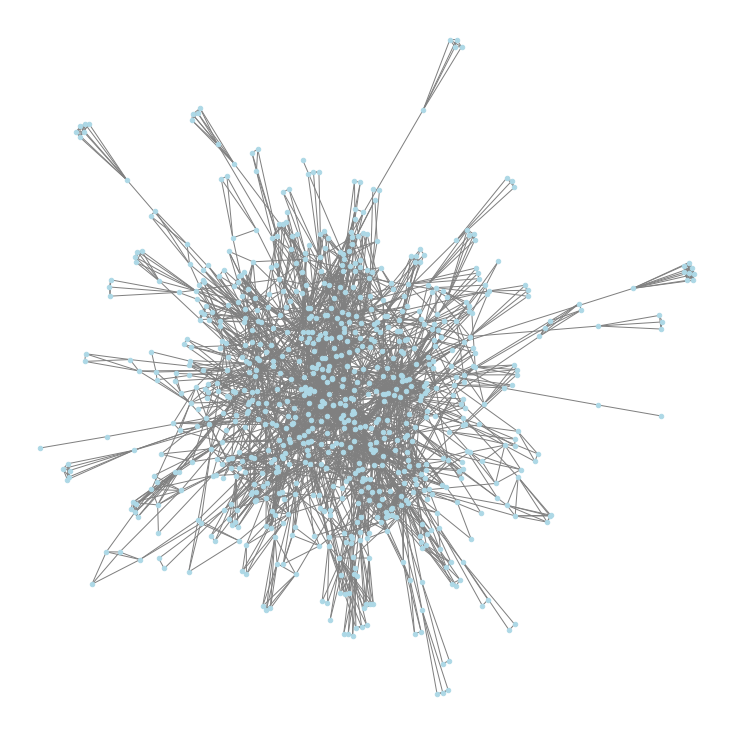

In [92]:
plt.figure(figsize=(10,10))
nx.draw(V2_LCC, node_color="lightblue", node_size=20, edge_color="gray")